## Exploring the Canadian Data Job Market project overview:

This project focuses on uncovering key insights into the Canadian job market for data professionals, particularly Data Analysts, Business Analysts, and Insights Analysts. The primary objective is to highlight the process of data cleaning and manipulation using Python, with targeted insights including:

1.	Industries hiring the most Data Analysts
2.	Common skills required for these roles
3.	Base salary expectations by experience level
4.	Company size and hiring trends
5.	The importance of degrees in the hiring process
6.	Work environment and job types
7.	Top hiring locations across Canada

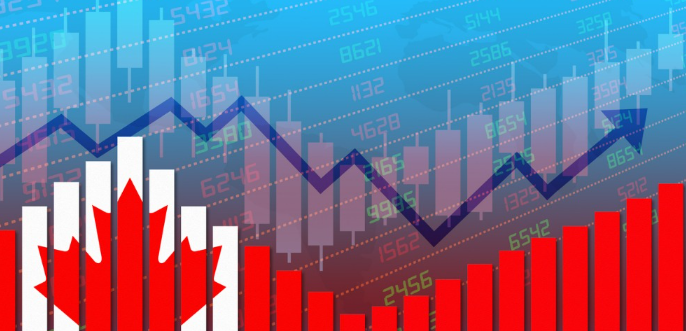

## Executive Summary with Tableau Dashboard 

You can access the Tableau Dashboard Insghts here https://public.tableau.com/views/2024CanadianDataanalystjobMarket/1_Map?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

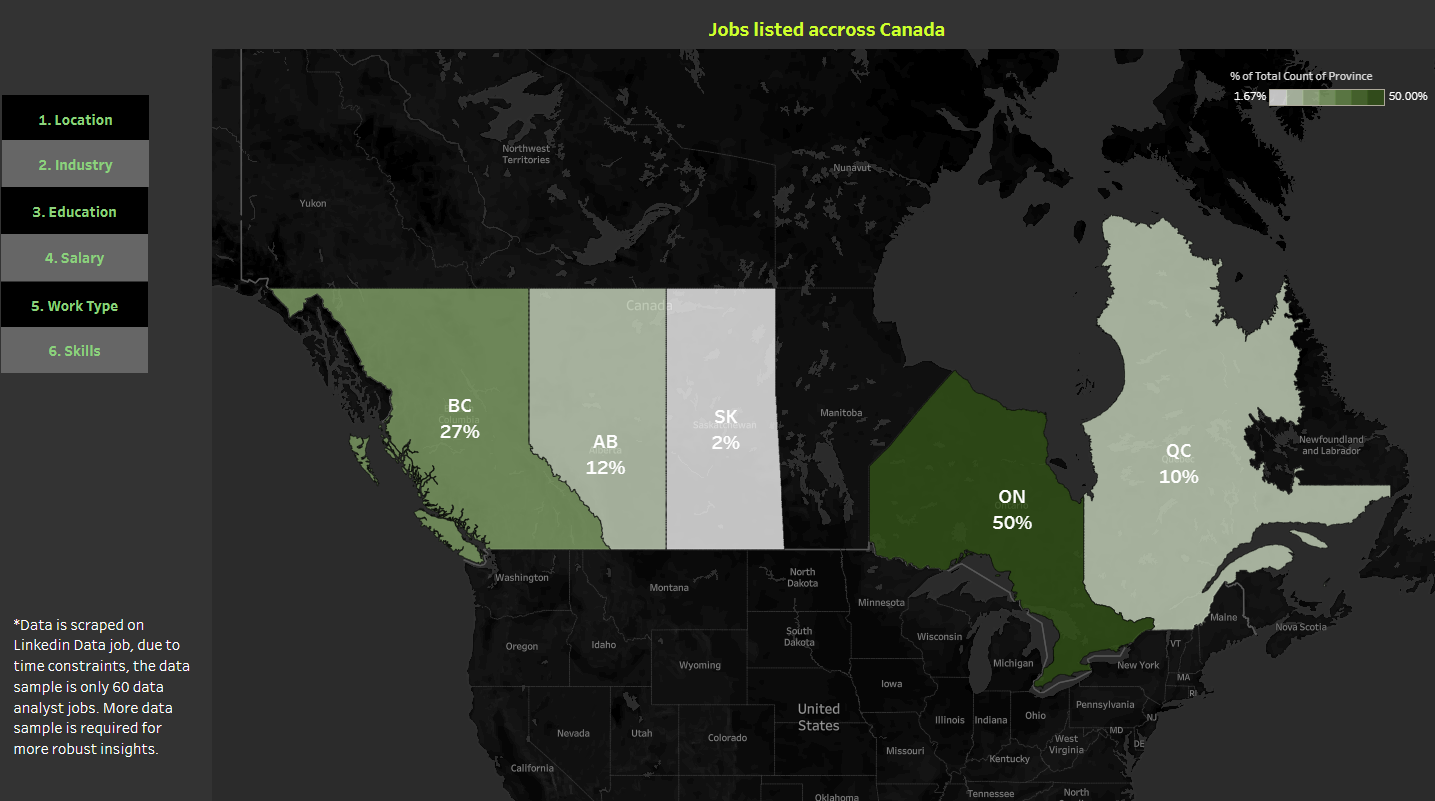

## Analysis Details

In [4]:
#import necessary libraries 
import pandas as pd 
import numpy as np

#Data visuliazation 
import seaborn as sns  
import matplotlib.pyplot as plt 
import plotly.express as px

#import regular expression to deal with strings 
import re
#Import data formatting libraries 
from pandas import Series, DataFrame

In [5]:
#Load the datset 
df_original = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Portfolio\Python_Data_analytics\Data Job Market Canada\Datasets\Data_Jobs_raw.csv", encoding='ISO-8859-1')

### 1. Data exploration

In [6]:
#View data
df_original.head(3)

,Job Title,Company Name,URL,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type
0,Data and Evaluation Analyst,BC Lung Foundation,https://www.linkedin.com/jobs/search/?currentJ...,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Analytics · Data Analysis ...,Non-profit Organizations 11-50 employees 26 on...,Hybrid,Full-time
1,"Analyst I, Growth Analytics",Affirm,https://www.linkedin.com/jobs/search/?currentJ...,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",NaN,1-3 years,Analytical Skills · Data Visualization · Dashb...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time
2,Data Analyst / Engineer,Data SEA Consulting,https://www.linkedin.com/jobs/search/?currentJ...,NaN,"Toronto, ON",11-50 employees,NaN,3,Analytical Skills · Data Analysis · Data Analy...,Information Technology & Services 11-50 employ...,On-site,Full-time


In [7]:
#See data total rows and columns 
df_original.shape

(60, 12)

In [8]:
#See columns data type and missing values 
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Job Title                60 non-null     object
 1   Company Name             60 non-null     object
 2   URL                      60 non-null     object
 3   Base Salary              20 non-null     object
 4   Company Location         60 non-null     object
 5   company size             60 non-null     object
 6   Educational Level        37 non-null     object
 7   Experience Requirements  46 non-null     object
 8   Job Skills               59 non-null     object
 9   Organization Type        60 non-null     object
 10  Work Environment         54 non-null     object
 11  Work Type                59 non-null     object
dtypes: object(12)
memory usage: 5.8+ KB


In [9]:
#See unique values for location
df_original['Company Location'].value_counts()

Company Location
Toronto, ON             24
Vancouver, BC           11
Montreal, QC             5
Edmonton, AB             3
Mississauga, ON          2
Burnaby, BC              2
Calgary, AB              2
North York, ON           1
Surrey, BC               1
Langley, BC              1
Markham, ON              1
Alberta, Canada          1
Ottawa, ON               1
Victoria, BC             1
Boucherville, QC         1
Saskatchewan, Canada     1
Compeer, AB              1
Greater Sudbury, ON      1
Name: count, dtype: int64

In [10]:
#See unique values for company size 
df_original['company size'].value_counts()

company size
10,001+ employees         18
1,001-5,000 employees     14
11-50 employees            7
5,001-10,000 employees     6
201-500 employees          6
51-200 employees           5
501-1,000 employees        4
Name: count, dtype: int64

In [11]:
#See unique values for  Work Environment and Work Type
print('Work environment: ', df_original['Work Environment'].unique())
print('Work type: ', df_original['Work Type'].unique())

Work environment:  ['Hybrid' 'Remote' 'On-site' nan]
Work type:  ['Full-time' 'Contract' 'Internship' nan 'Temporary']


In [12]:
#Check for null values 
df_original.isnull().sum()

Job Title                   0
Company Name                0
URL                         0
Base Salary                40
Company Location            0
company size                0
Educational Level          23
Experience Requirements    14
Job Skills                  1
Organization Type           0
Work Environment            6
Work Type                   1
dtype: int64

In [13]:
#Check for duplicates 
df_original.duplicated().sum()

0

### Data cleaning and transformation

*Since this process is iterative so I will clean and transform the data along with the EDA stage.

**Create an Industry column**

I create an Industry column extracting from the organization type colum

In [14]:
#Create an Industry column based on organization type column 
df_original['Industry'] = df_original['Organization Type'].apply(lambda x: re.split(r'\d', x)[0].strip())
df_original.head(2)

,Job Title,Company Name,URL,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry
0,Data and Evaluation Analyst,BC Lung Foundation,https://www.linkedin.com/jobs/search/?currentJ...,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Analytics · Data Analysis ...,Non-profit Organizations 11-50 employees 26 on...,Hybrid,Full-time,Non-profit Organizations
1,"Analyst I, Growth Analytics",Affirm,https://www.linkedin.com/jobs/search/?currentJ...,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",NaN,1-3 years,Analytical Skills · Data Visualization · Dashb...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services


In [15]:
#Check unique values in Industry column 
print(df_original['Industry'].value_counts())

Industry
Financial Services                      10
Software Development                     6
IT Services and IT Consulting            5
Banking                                  4
Staffing and Recruiting                  4
Retail                                   4
Technology, Information and Internet     3
Non-profit Organizations                 2
Business Consulting and Services         2
Entertainment Providers                  2
Consumer Services                        2
Telecommunications                       1
Gambling Facilities and Casinos          1
Hospitals and Health Care                1
Accounting                               1
Government Administration                1
Food and Beverage Services               1
Music                                    1
Human Resources                          1
Professional Services                    1
Information Services                     1
Investment Banking                       1
Insurance                                1
Se

*Since Non-profit organization NPO are not the industry so I will change it to the industry based on the company name 

In [16]:
#identify the NPOs
df_original[df_original['Industry'] == 'Non-profit Organizations']

,Job Title,Company Name,URL,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry
0,Data and Evaluation Analyst,BC Lung Foundation,https://www.linkedin.com/jobs/search/?currentJ...,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Analytics · Data Analysis ...,Non-profit Organizations 11-50 employees 26 on...,Hybrid,Full-time,Non-profit Organizations
43,Data Reporting Analyst - Toronto/Pickering,Make-A-Wish Canada,https://www.linkedin.com/jobs/search/?currentJ...,"Dr. Jeremy Friedman, Associate Paediatrician-i...","Toronto, ON",51-200 employees,Undergraduate degree,7,Analytics · Data Analysis · Data Analytics · D...,Non-profit Organizations 51-200 employees 222 ...,Hybrid,Full-time,Non-profit Organizations


Both NPO are Hospitals and Health Care industry 

In [17]:
#Replace the Non-profit Organizations with Hospitals and Health Care  
df_original['Industry'] = df_original['Industry'].replace('Non-profit Organizations', 'Hospitals and Health Care')
df_original[df_original['Industry'] == 'Non-profit Organizations']

,Job Title,Company Name,URL,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry


In [18]:
#Recheck unique values in Industry column 
print(df_original['Industry'].value_counts())

Industry
Financial Services                      10
Software Development                     6
IT Services and IT Consulting            5
Retail                                   4
Banking                                  4
Staffing and Recruiting                  4
Technology, Information and Internet     3
Hospitals and Health Care                3
Entertainment Providers                  2
Consumer Services                        2
Business Consulting and Services         2
Music                                    1
Gambling Facilities and Casinos          1
Accounting                               1
Government Administration                1
Food and Beverage Services               1
Telecommunications                       1
Human Resources                          1
Professional Services                    1
Information Services                     1
Investment Banking                       1
Insurance                                1
Security and Investigations              1
Ad

**Drop unecessary columns**

In [19]:
#Drop columns 
df_original = df_original.drop(['Job Title', 'Company Name', 'URL'], axis= 1)

**Ensure the experience requirement column is in proper numeric format**

In [20]:
#identify any rows with non numeric in the experience requirement column
def abc(x):
    return not str(x).isdigit()

df_original[df_original['Experience Requirements'].apply(abc)]

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry
1,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",NaN,1-3 years,Analytical Skills · Data Visualization · Dashb...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC","10,001+ employees",NaN,NaN,Microsoft Azure · Data Analysis · Data Analyti...,"Security and Investigations 10,001+ employees ...",Hybrid,Full-time,Security and Investigations
9,NaN,"Compeer, AB","1,001-5,000 employees",Post-secondary degree,NaN,Data Management · Data Modeling · Data Enginee...,"Financial Services 1,001-5,000 employees 1,033...",On-site,Internship,Financial Services
15,"$62,000 - $92,000","Calgary, AB","10,001+ employees",Undergraduate degree,NaN,Analytical Skills · Communication · Data Analy...,"Business Consulting and Services 10,001+ emplo...",Hybrid,Full-time,Business Consulting and Services
19,NaN,"Toronto, ON","10,001+ employees",Post-secondary degree,NaN,Analytics · Data Analytics · Data Engineering ...,"Banking 10,001+ employees 92,008 on LinkedIn",On-site,Internship,Banking
22,30-38 hr,"Vancouver, BC",51-200 employees,NaN,NaN,Python (Programming Language) · Reporting & An...,Information Services 51-200 employees 187 on L...,On-site,Full-time,Information Services
23,NaN,"Toronto, ON","10,001+ employees",Undergraduate degree,NaN,Analytics · Data Analytics · Data Quality · Da...,"Banking 10,001+ employees 93,167 on LinkedIn",On-site,Internship,Banking
35,NaN,"Calgary, AB","10,001+ employees",Undergraduate degree,NaN,Communication · Critical Thinking · Data Analy...,"Banking 10,001+ employees 91,418 on LinkedIn",Hybrid,Full-time,Banking
36,NaN,"Edmonton, AB",11-50 employees,NaN,NaN,Data Analytics · Data Quality · Data Science ·...,Staffing and Recruiting 11-50 employees 22 on ...,Remote,Contract,Staffing and Recruiting
37,NaN,"Vancouver, BC","501-1,000 employees",Undergraduate degree,NaN,Analytical Skills · Communication · Data Analy...,"Financial Services 501-1,000 employees 845 on ...",Hybrid,Full-time,Financial Services


In [21]:
#Replace 1-3 years with 2  
df_original['Experience Requirements'] = df_original['Experience Requirements'].replace('1-3 years', 2)
df_original[df_original['Experience Requirements'] == '1-3 years']

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry


In [22]:
#Replace Nan with 0 
df_original['Experience Requirements'] = df_original['Experience Requirements'].fillna(0).astype(int)

In [23]:
#Change into numeric data type
df_original['Experience Requirements'] = df_original['Experience Requirements'].astype(int)
df_original.head(3)

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Analytics · Data Analysis ...,Non-profit Organizations 11-50 employees 26 on...,Hybrid,Full-time,Hospitals and Health Care
1,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",NaN,2,Analytical Skills · Data Visualization · Dashb...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services
2,NaN,"Toronto, ON",11-50 employees,NaN,3,Analytical Skills · Data Analysis · Data Analy...,Information Technology & Services 11-50 employ...,On-site,Full-time,Information Technology & Services


In [24]:
#Fill 'Not required' for NaN in education level column 
df_original['Educational Level'] = df_original['Educational Level'].fillna('Not required')
df_original['Educational Level']. value_counts()

Educational Level
Undergraduate degree     27
Not required             23
Post-secondary degree     8
Master degree             2
Name: count, dtype: int64

**Create a company type column based on the company size**

Small size: 11-50, 51-200\
Medium size: 201-500, 501-1000\
Large size:  1,001-5,000, 5,001-10,000, 10,001+

In [25]:
df_original['company size'].value_counts()

company size
10,001+ employees         18
1,001-5,000 employees     14
11-50 employees            7
5,001-10,000 employees     6
201-500 employees          6
51-200 employees           5
501-1,000 employees        4
Name: count, dtype: int64

In [26]:
#define a classifying function 
def company_classifier(x):
    if x in ['11-50 employees', '51-200 employees']:
     return ('Small')
    elif x in ['201-500 employees', '501-1,000 employees']:
     return ('Medium')
    else:
      return('large')
    
  #Apply the fucntion to the dataframe 
df_original['Company Type'] = df_original['company size'].apply(company_classifier)

In [27]:
df_original.head(4)

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry,Company Type
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Analytics · Data Analysis ...,Non-profit Organizations 11-50 employees 26 on...,Hybrid,Full-time,Hospitals and Health Care,Small
1,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",Not required,2,Analytical Skills · Data Visualization · Dashb...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services,large
2,NaN,"Toronto, ON",11-50 employees,Not required,3,Analytical Skills · Data Analysis · Data Analy...,Information Technology & Services 11-50 employ...,On-site,Full-time,Information Technology & Services,Small
3,70-90,"Montreal, QC",11-50 employees,Not required,2,Data Analysis · Data Analytics · Data Visualiz...,Advertising Services 11-50 employees 64 on Lin...,Hybrid,Full-time,Advertising Services,Small


### Exploratory data analysis (EDA)

**Which industries are hiring the most Data Analyst**

In [28]:
#Prepare data for visualizations 
ind_df = df_original['Industry'].value_counts().reset_index()

Text(11, 11, 'Observations: The bar graph shows\ntop industries that are hiring data analyst.\nFinancial Services, Software Development\nand IT services are among the top industries.')

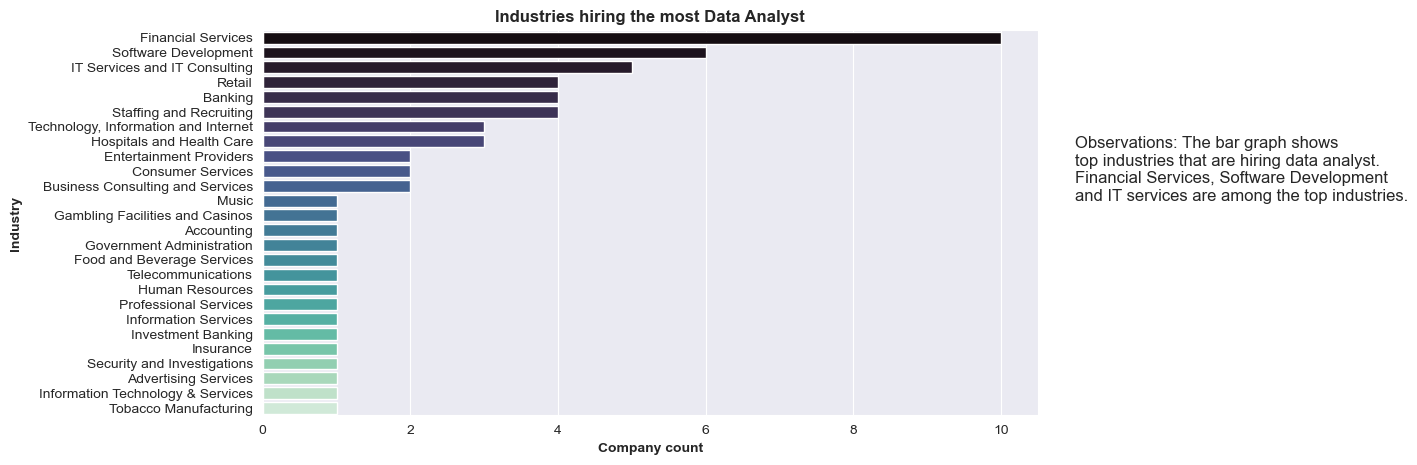

In [29]:
#Visualization
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.barplot(data= ind_df, x= 'count', y= 'Industry', palette= 'mako')

#Add title 
plt.title('Industries hiring the most Data Analyst', weight = 'bold')
plt.xlabel('Company count', weight = 'bold')
plt.ylabel('Industry', weight = 'bold')

# Add description text
plt.text(11, 11, 'Observations: The bar graph shows\ntop industries that are hiring data analyst.\nFinancial Services, Software Development\nand IT services are among the top industries.', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**Work environment and Job type**

In [30]:
#Prepare data for Job type visualization 
type_df = df_original['Work Type'].value_counts(normalize=True).reset_index()
type_df

,Work Type,proportion
0,Full-time,0.728814
1,Contract,0.186441
2,Internship,0.067797
3,Temporary,0.016949


In [31]:
#Prepare data for work environment visualization 
env_df = df_original['Work Environment'].value_counts(normalize=True).reset_index()
env_df

,Work Environment,proportion
0,Hybrid,0.462963
1,On-site,0.351852
2,Remote,0.185185


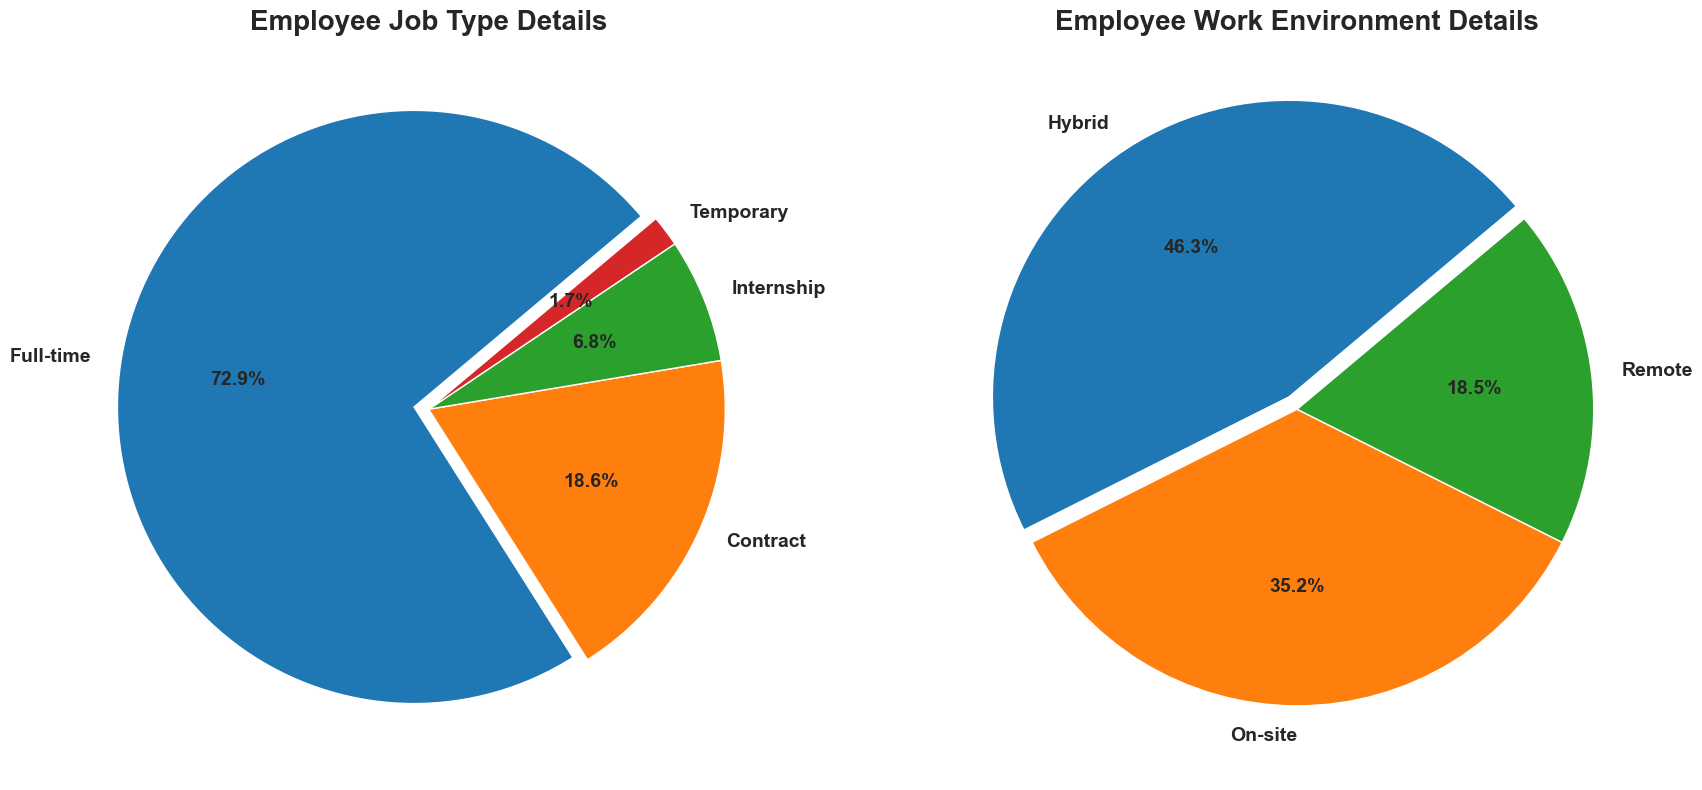

In [32]:
# Create a 1x2 grid for two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# First pie chart - Job Type Details
explode1 = (0.05, 0, 0, 0)
ax1.pie(type_df['proportion'], labels=type_df['Work Type'], autopct='%1.1f%%', 
        startangle=40, explode=explode1, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax1.set_title('Employee Job Type Details', weight='bold', fontsize=20)

# Second pie chart - Work Environment Details
explode2 = (0.05, 0, 0)
ax2.pie(env_df['proportion'], labels=env_df['Work Environment'], autopct='%1.1f%%', 
        startangle=40, explode=explode2, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax2.set_title('Employee Work Environment Details', weight='bold', fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the combined pie charts
plt.show()

**Company Type and Education level**

In [33]:
#Prepare the data for visualization
company_type = df_original.groupby(['Company Type', 'Educational Level']).size()
company_type = pd.DataFrame(company_type)
company_type.columns = ['Count']
company_type = company_type.reset_index()
company_type

,Company Type,Educational Level,Count
0,Medium,Not required,3
1,Medium,Post-secondary degree,2
2,Medium,Undergraduate degree,5
3,Small,Not required,6
4,Small,Post-secondary degree,1
5,Small,Undergraduate degree,5
6,large,Master degree,2
7,large,Not required,14
8,large,Post-secondary degree,5
9,large,Undergraduate degree,17


Text(2.7, 11, 'Observations: Overall, large enterprises tend\nto hire more data analysts and usually\nrequire some post-secondary degrees.\nEducation degress are often not required\nin small companies than medium and large enterprises.')

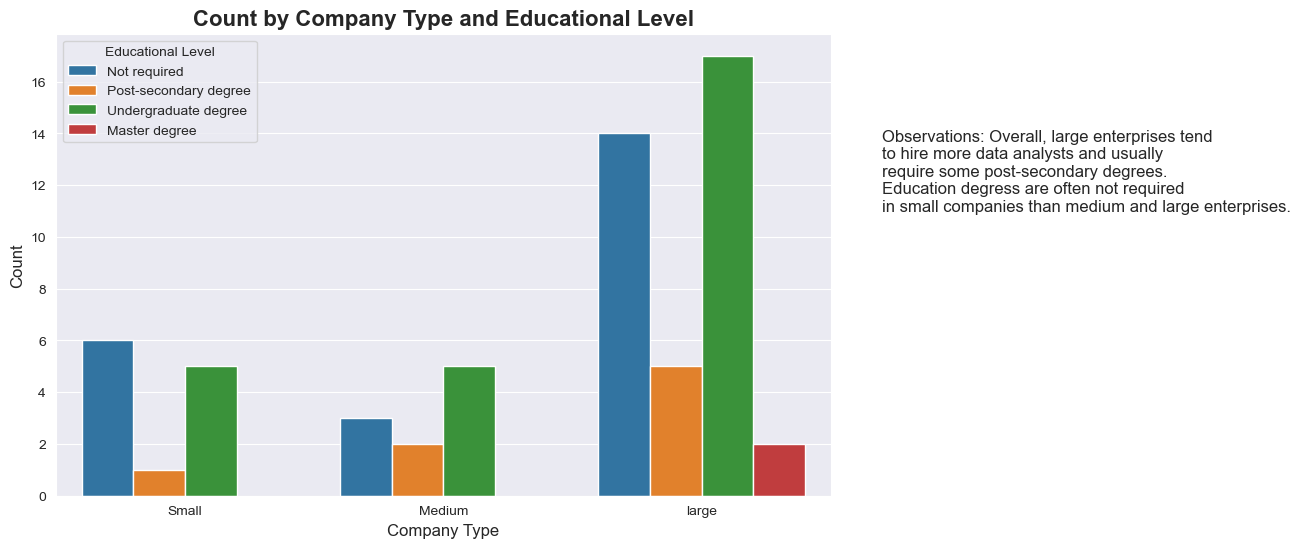

In [34]:
#Visualization 
# Set plot size
plt.figure(figsize=(10, 6))

# Create a barplot
order = ['Small', 'Medium', 'large']
sns.barplot(x='Company Type', y='Count', hue='Educational Level', data= company_type, order = order)

# Add title and labels
plt.title('Count by Company Type and Educational Level', fontsize=16, weight= 'bold')
plt.xlabel('Company Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add description text
plt.text(2.7, 11, 'Observations: Overall, large enterprises tend\nto hire more data analysts and usually\nrequire some post-secondary degrees.\nEducation degress are often not required\nin small companies than medium and large enterprises.', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**Base salary versus experience level**

In [35]:
#Filter out nulls for base salaries column 
df_subset = df_original.dropna(subset= ['Base Salary'], axis= 0)

#Drop unecessary columns 
df_subset = df_subset.drop(['company size',  'Organization Type', 'Job Skills', 'Work Environment', 'Work Type' ], axis =1)
df_subset.head(3)

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",Undergraduate degree,3,Hospitals and Health Care,Small
1,"$90,000 - $130,000","Victoria, BC",Not required,2,Financial Services,large
3,70-90,"Montreal, QC",Not required,2,Advertising Services,Small


**Standardize data containing pay per hour, convert to annual salary**

In [36]:
#identify hourly pay
keywords = ['hr', 'HR', 'hour', 'Hr', 'hours']
df_subset[df_subset['Base Salary'].apply(lambda x: any(keyword in str(x) for keyword in keywords))]

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type
17,45-55 hr,"Toronto, ON",Not required,5,Human Resources,Small
22,30-38 hr,"Vancouver, BC",Not required,0,Information Services,Small


In [37]:
#replace these hourly pay with their annual salary 
df_subset['Base Salary'] = df_subset['Base Salary'].replace({'45-55 hr': '$93,000-$114,000', '30-38 hr': '$62,000-$79,000'})

In [38]:
#Remove any rows that dont contain a number. The column is still in Object format 
df_subset['Base Salary'].value_counts().reset_index()

,Base Salary,count
0,"Salary range: CAD 70,000  CAD 75,000",1
1,"$90,000 - $130,000",1
2,"$53,000 to $79,500",1
3,"$53,000 to $66,000",1
4,"$68,561 - $90,011",1
5,"Dr. Jeremy Friedman, Associate Paediatrician-i...",1
6,"$55,352 - $69,190",1
7,"$92,880.00 - $116,100.00",1
8,120-150k,1
9,"129,700 - 207,300",1


**To clean the Base Salary column**

My strategy is to remove any special characters and letters, and then split the data in to Min Salary and Max Salary columns

In [39]:
#Remove all letters
def remove_letters(s):
    # Remove all letters from the string, keeping only digits and special characters
    return re.sub(r'[a-zA-Z]', '', s)

df_subset['Base Salary_no_letters'] = df_subset['Base Salary'].apply(remove_letters)


In [40]:
#Remove all dollar sign 
def remove_dollar_sign(s):
    return s.replace('$', '')
df_subset['Base Salary_no_$'] = df_subset['Base Salary_no_letters'].apply(remove_dollar_sign)

In [41]:
# Replace all special characters (non-alphanumeric) with a space
def replace_special_chars_with_space(s):
    return re.sub(r'[^\w\s]', ' ', s)
df_subset['Base Salary_no_special'] = df_subset['Base Salary_no_$'].apply(replace_special_chars_with_space)

In [42]:
# Remove non-numeric characters except spaces and split the string to min and max salary range 
def split_salary_range(s):

    cleaned = re.sub(r'[^\d\s]', '', s).strip() #Remove any character that is not a digit or a whitespace
    parts = re.split(r'\s+', cleaned)  # Split by any whitespace for example 70 000 - 75 000 would be ['70', '000', '75', '000']
    
    # Return min and max values based on the number of parts
    '''
    The logic behind this fucntion is if the list parts contain like ['70', '90'] then it will put them as 70 for min and 90 for max'.
    If our list parts contain ['70', '000', '75', '000'] then it will put as 70000 for min and 75000 for max

    '''
    if len(parts) == 2:
        return int(parts[0]), int(parts[1])
    elif len(parts) == 4:
        return int(parts[0] + parts[1]), int(parts[2] + parts[3])
    return None, None

# Apply the function and create new columns
df_subset[['Min Salary', 'Max Salary']] = df_subset['Base Salary_no_special'].apply(split_salary_range).apply(pd.Series)


In [43]:
df_subset.head()

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type,Base Salary_no_letters,Base Salary_no_$,Base Salary_no_special,Min Salary,Max Salary
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",Undergraduate degree,3,Hospitals and Health Care,Small,": 70,000  75,000",": 70,000  75,000",70 000 75 000,70000.0,75000.0
1,"$90,000 - $130,000","Victoria, BC",Not required,2,Financial Services,large,"$90,000 - $130,000","90,000 - 130,000",90 000 130 000,90000.0,130000.0
3,70-90,"Montreal, QC",Not required,2,Advertising Services,Small,70-90,70-90,70 90,70.0,90.0
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC",Not required,0,Security and Investigations,large,"$65,000/ - $75,000/","65,000/ - 75,000/",65 000 75 000,65000.0,75000.0
6,55-75,"Toronto, ON",Not required,2,Staffing and Recruiting,large,55-75,55-75,55 75,55.0,75.0


In [44]:
#identify any column with Nulls 
df_subset[df_subset['Min Salary'].isna()]

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type,Base Salary_no_letters,Base Salary_no_$,Base Salary_no_special,Min Salary,Max Salary
34,"$92,880.00 - $116,100.00","Langley, BC",Undergraduate degree,5,Retail,large,"$92,880.00 - $116,100.00","92,880.00 - 116,100.00",92 880 00 116 100 00,NaN,NaN
43,"Dr. Jeremy Friedman, Associate Paediatrician-i...","Toronto, ON",Undergraduate degree,7,Hospitals and Health Care,Small,". , --, &; --®",". , --, &; --®",,NaN,NaN


It seems there is an error for row 34 because of the extra trailing zeros. Steps to fix:\
  -populate 92880 to min and 116100 to max.\
  -drop row 43


In [45]:
#Set Min and Max for row 34 
df_subset.loc[34, 'Min Salary'] = 92880
df_subset.loc[34, 'Max Salary'] = 116100

In [46]:
#Drop row 43
df_subset.drop(index = 43, inplace= True)

In [47]:
#Create a new column called median salary ((min +max)/2)
df_subset['Median Salary'] = (df_subset['Min Salary'] + df_subset['Max Salary'])/2

**Final touch**

Some salary is only 65, possible the data is 65k and since we have removed the k so i want to increase the zeros. 

In [48]:
#Define a function to increase 3 zeros 
def correct_salary_value(value):
    # If the value is less than 1000, assume it's missing the 'k' suffix
    if value < 1000:
        return value * 1000
    return value

df_subset['Median Salary'] = df_subset['Median Salary'].apply(correct_salary_value)
df_subset.head()

,Base Salary,Company Location,Educational Level,Experience Requirements,Industry,Company Type,Base Salary_no_letters,Base Salary_no_$,Base Salary_no_special,Min Salary,Max Salary,Median Salary
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",Undergraduate degree,3,Hospitals and Health Care,Small,": 70,000  75,000",": 70,000  75,000",70 000 75 000,70000.0,75000.0,72500.0
1,"$90,000 - $130,000","Victoria, BC",Not required,2,Financial Services,large,"$90,000 - $130,000","90,000 - 130,000",90 000 130 000,90000.0,130000.0,110000.0
3,70-90,"Montreal, QC",Not required,2,Advertising Services,Small,70-90,70-90,70 90,70.0,90.0,80000.0
5,"CA$65,000/yr - CA$75,000/yr","Burnaby, BC",Not required,0,Security and Investigations,large,"$65,000/ - $75,000/","65,000/ - 75,000/",65 000 75 000,65000.0,75000.0,70000.0
6,55-75,"Toronto, ON",Not required,2,Staffing and Recruiting,large,55-75,55-75,55 75,55.0,75.0,65000.0


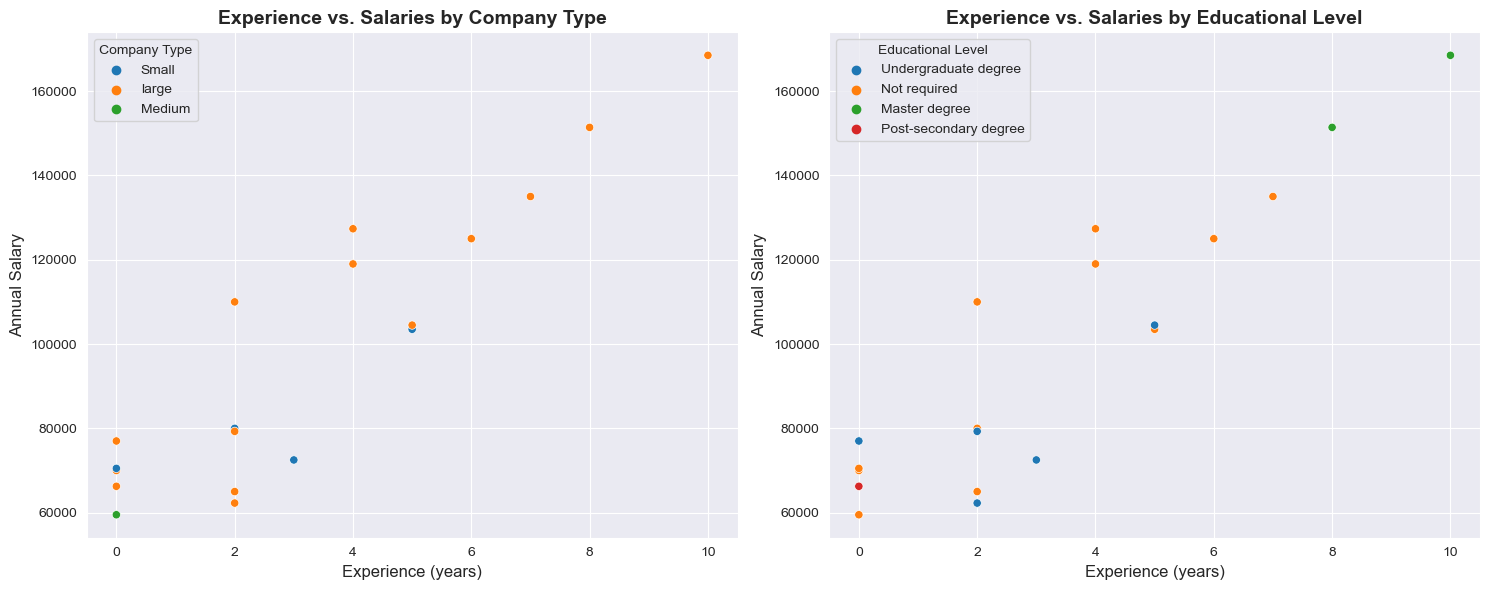

In [49]:
# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figsize to your preference

# First scatter plot: Salaries vs. Experience by Company Type
sns.scatterplot(data=df_subset, x='Experience Requirements', y='Median Salary', hue='Company Type', ax=axes[0])
axes[0].set_title('Experience vs. Salaries by Company Type', fontsize=14, weight='bold')
axes[0].set_xlabel('Experience (years)', fontsize=12)
axes[0].set_ylabel('Annual Salary', fontsize=12)

# Second scatter plot: Salaries vs. Experience by Educational Level
sns.scatterplot(data=df_subset, x='Experience Requirements', y='Median Salary', hue='Educational Level', ax=axes[1])
axes[1].set_title('Experience vs. Salaries by Educational Level', fontsize=14, weight='bold')
axes[1].set_xlabel('Experience (years)', fontsize=12)
axes[1].set_ylabel('Annual Salary', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**Observation**:  There is a positive relationship between years of experience and annual salary, as expected. Larger enterprises tend to offer higher salaries for data analysts, while educational level shows little influence on this trend. However, a larger sample size is needed for more robust insights.

**What are the most common skills required for a data analyst**

In [50]:
#View data, we will use the Job Skills column
df_original.head(2)

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry,Company Type
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Analytics · Data Analysis ...,Non-profit Organizations 11-50 employees 26 on...,Hybrid,Full-time,Hospitals and Health Care,Small
1,"$90,000 - $130,000","Victoria, BC","1,001-5,000 employees",Not required,2,Analytical Skills · Data Visualization · Dashb...,"Financial Services 1,001-5,000 employees 2,437...",Remote,Full-time,Financial Services,large


In [51]:
#Split the skills column so each row will contain only one skill 
split = df_original['Job Skills'].str.split('·').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'Skills_split'
df_subset2 = df_original.join(split)
df_subset2.head(3)

,Base Salary,Company Location,company size,Educational Level,Experience Requirements,Job Skills,Organization Type,Work Environment,Work Type,Industry,Company Type,Skills_split
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Analytics · Data Analysis ...,Non-profit Organizations 11-50 employees 26 on...,Hybrid,Full-time,Hospitals and Health Care,Small,Analytical Skills
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Analytics · Data Analysis ...,Non-profit Organizations 11-50 employees 26 on...,Hybrid,Full-time,Hospitals and Health Care,Small,Analytics
0,"Salary range: CAD 70,000  CAD 75,000","Vancouver, BC",11-50 employees,Undergraduate degree,3,Analytical Skills · Analytics · Data Analysis ...,Non-profit Organizations 11-50 employees 26 on...,Hybrid,Full-time,Hospitals and Health Care,Small,Data Analysis


In [52]:
#Change the unique skills to string type 
df_subset2['Skills_split'] = df_subset2['Skills_split'].astype(str)

#Check the unique skills 
bar = df_subset2['Skills_split'].value_counts().reset_index()
bar[bar['count'] > 5]

,Skills_split,count
0,SQL,43
1,Data Analytics,42
2,Data Visualization,26
3,Data Science,24
4,Problem Solving,23
5,Python,21
6,Data Analysis,18
7,Analytical Skills,16
8,Excel,15
9,Communication,15


There is a problem with this, there are many wrong formating among the skills causing misleading information\
so i will define a function to group the skills 

In [53]:
#Define a grouping fucntion
def classify_skill(skill):
    # Define the mapping of similar skills to a common label
    skill = skill.lower()  # Convert to lowercase for consistency
    if 'excel' in skill or 'pivot tables' in skill:
        return 'Excel'
    elif 'sql' in skill or 'query' in skill:
        return 'SQL'
    elif 'python' in skill:
        return 'Python'
    elif 'communication' in skill:
        return 'Communication'
    elif 'analytical' in skill or 'problem solving' in skill or 'critical thinking' in skill:
        return 'Analytical Thinking'
    elif 'tableau' in skill:
        return 'Tableau'
    elif 'power bi' in skill or 'powerbi' in skill:
        return 'Power BI'
    elif 'data visualization' in skill or 'visualization' in skill or 'dashboards' in skill:
        return 'Data Visualization'
    elif 'data analysis' in skill or 'analytics' in skill:
        return 'Data Analysis'
    elif 'data science' in skill:
        return 'Data Science'
    elif 'statistics' in skill or 'statistical' in skill:
        return 'Statistics'
    elif 'data engineering' in skill:
        return 'Data Engineering'
    elif 'amazon' in skill or 'aws' in skill:
        return 'AWS'
    elif 'r programming' in skill or 'r (programming language)'in skill:
        return 'R'
    elif 'database' in skill:
        return 'Database'
    elif 'sas' in skill:
        return 'SAS'
    elif 'pipeline' in skill:
        return 'Data pipeline'
    elif 'azure' in skill:
        return 'Azure'
    elif 'ad hoc' in skill or 'ad-hoc' in skill:
        return 'Ad hoc analysis'
    elif 'models' in skill or 'data modeling' in skill or 'modeling' in skill:
        return 'Data modeling'
    elif 'etl' in skill:
        return 'ETL'
    
    # Add more elif conditions as necessary for other skills

    # If no match, return the original skill
    return skill.title()  # Return title case for consistency

In [54]:
#Apply the function 
df_subset2['Skills_grouped'] = df_subset2['Skills_split'].apply(classify_skill)

In [55]:
#Data for visualization
df_final = df_subset2['Skills_grouped'].value_counts().reset_index()
df_final = df_final[df_final['count'] >1]
df_final

,Skills_grouped,count
0,Data Analysis,91
1,SQL,57
2,Analytical Thinking,54
3,Data Visualization,45
4,Python,34
5,Communication,27
6,Data Science,25
7,Database,25
8,Excel,24
9,Power BI,19


Our classification function has an error, it couldn't capture R fully as the letter R alone could be in many words so i manually update it

In [56]:
#identify how many R programming language appeared. 
df_final[(df_final['Skills_grouped'] == 'R') | (df_final['Skills_grouped'] == ' R')]

,Skills_grouped,count
34,R,3
39,R,2


In [57]:
#Increase R by 5
df_final.loc[19, 'count'] = 10
df_final = df_final[df_final['count'] >=5]
df_final = df_final.sort_values(by= 'count', ascending= False)

Text(0, 0.5, 'Skills')

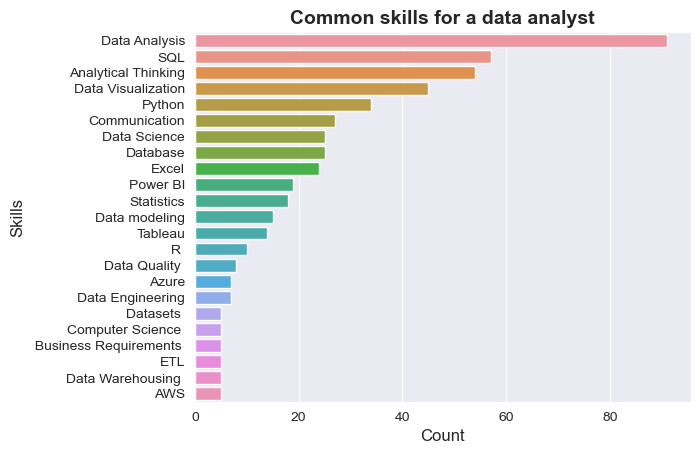

In [58]:
#Create a bar graph visualization 
sns.barplot(data= df_final, x='count', y='Skills_grouped')

# Add title and labels
plt.title('Common skills for a data analyst', fontsize=14, weight= 'bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Skills', fontsize=12)